In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# MNIST Data

In [3]:
import tensorflow as tf
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(raw_train_y[:10])

[5 0 4 1 9 2 1 3 1 4]


In [6]:
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

5


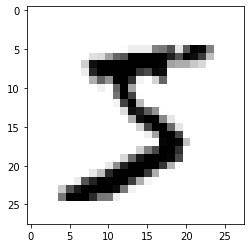

0


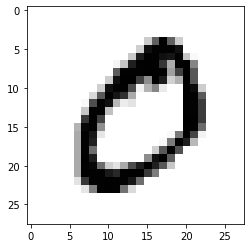

4


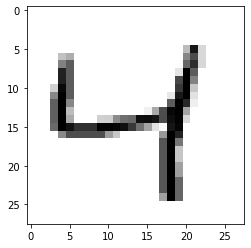

1


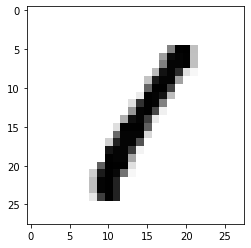

In [4]:
for i in range(4):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()

# DNN Image Classification

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255


model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.9327 - acc: 0.7182
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3835 - acc: 0.8892
Epoch 3/5
60000/60000 [==

(10000, 10)
[1.0549692e-05 2.8349370e-09 4.4677453e-04 1.7307223e-03 3.7458751e-08
 1.6179058e-05 4.4151372e-14 9.9534142e-01 7.3097681e-06 2.4469160e-03]
(10000, 28, 28)


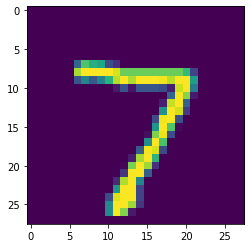

[7 2 1 ... 4 5 6]


In [13]:
y_ = model.predict(test_x)
print(y_.shape)
print(y_[0])

print(test_x.shape)
plt.imshow(test_x[0])
plt.show()

predicted = np.argmax(y_, axis=1)

print(predicted)


# CNN Image Classification

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

# Conv2D는 width*height*channel을 입력으로 받음
train_x = train_x.reshape((60000, 28, 28, 1)) # ADDED
test_x = test_x.reshape((10000, 28, 28, 1)) # ADDED

train_y = raw_train_y
test_y = raw_test_y


model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                16010     
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

# Dogs Data


```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
```

In [17]:
%%shell
rm -rf dogs_prepared.tar.gz
wget https://github.com/dhrim/chungbuk_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
ls -al  

--2021-04-22 01:02:39--  https://github.com/dhrim/chungbuk_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/chungbuk_2021/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2021-04-22 01:02:39--  https://raw.githubusercontent.com/dhrim/chungbuk_2021/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   156MB/s    in 0.4s    

2021-04-22 0

In [18]:
%%shell
rm -rf dogs_prepared
tar xvfz dogs_prepared.tar.gz
ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

# CNN Image Classification with Data Augmentation

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import time


model = keras.Sequential()
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

BATCH_SIZE=64

def preprocess_input(images):
  return images
  # return images/255.0

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

# model.fit(train_x, train_y, ...)

model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=10
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1866250   
_________________________________________________________________
dense_22 (Dense)             (None, 10)               

# VGG16 Image Classification

In [21]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


model = VGG16(weights='imagenet', input_shape=(224, 224, 3))

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,      
      class_mode='sparse'
)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)



label = vgg16.decode_predictions(y_)
# label = [[('n02655020', 'puffer', 0.9612253), ... ]]
print(label[:5])

# 가장 확률이 높은 결과를 획득
label = label[0][0]
# label = ('n02655020', 'puffer', 0.9612253)
print(label)

# 라벨과 라벨을 예측한 확률을 출력
print('%s (%.2f%%)' % (label[1], label[2]*100))    



553467904/553467096 [==============================] - 7s 0us/step
Found 388 images belonging to 10 classes.
40960/35363 [==================================] - 0s 0us/step
[[('n02086079', 'Pekinese', 0.9664796), ('n02098413', 'Lhasa', 0.021431103), ('n02086240', 'Shih-Tzu', 0.010038522), ('n02097474', 'Tibetan_terrier', 0.001159579), ('n02328150', 'Angora', 0.0003073933)], [('n02087046', 'toy_terrier', 0.288302), ('n02096585', 'Boston_bull', 0.23576999), ('n02085620', 'Chihuahua', 0.11931902), ('n02110185', 'Siberian_husky', 0.10802616), ('n02105412', 'kelpie', 0.0246093)], [('n02085936', 'Maltese_dog', 0.9132927), ('n02086240', 'Shih-Tzu', 0.028762966), ('n02098413', 'Lhasa', 0.027674478), ('n02113624', 'toy_poodle', 0.0088896835), ('n02086079', 'Pekinese', 0.0075308685)], [('n02088094', 'Afghan_hound', 0.9917468), ('n02102318', 'cocker_spaniel', 0.0028173653), ('n02088466', 'bloodhound', 0.0020909067), ('n02091635', 'otterhound', 0.0010062137), ('n02100877', 'Irish_setter', 0.0009702

In [22]:
print(y_.shape)
print(y_[0])

(388, 1000)
[2.34438458e-11 3.19004628e-10 3.07313654e-11 5.39919108e-12
 1.64821629e-11 1.10825527e-09 3.66100950e-09 4.13122649e-07
 3.20145750e-06 2.89574342e-09 5.87274507e-10 4.65116723e-10
 3.30391581e-09 5.54560042e-09 1.82631812e-10 3.97636674e-10
 8.44837356e-09 1.85611722e-08 1.89685578e-09 3.81128871e-08
 2.39893799e-10 1.01094266e-09 1.67140982e-10 2.67855533e-08
 4.26293241e-08 9.35366437e-11 2.22466247e-11 1.29679115e-10
 1.82950821e-10 8.34704042e-11 1.21518934e-10 4.76588977e-11
 4.90671226e-10 1.83624571e-09 1.39524383e-08 2.98017860e-10
 8.91357765e-10 1.60814972e-09 1.38055595e-10 1.59063540e-10
 1.42450454e-10 7.17166548e-10 1.16948798e-10 5.49821355e-10
 9.40568873e-11 5.35858202e-09 3.06382031e-10 4.88509198e-11
 6.05166750e-11 1.21613761e-10 1.32048775e-10 6.44298642e-11
 6.76366685e-10 1.35327527e-10 3.77385734e-10 3.96477212e-10
 7.19063586e-10 1.39637202e-09 5.24433164e-10 4.69738526e-10
 3.00595526e-09 8.45790937e-11 1.50201601e-10 3.17681402e-11
 2.42460479e

# VGG16 Transfer Learning

In [23]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=10
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


58892288/58889256 [==============================] - 1s 0us/step
Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/23 [==============================] - 26s 1s/step - loss: 128.0740 - acc: 0.5460 - val_loss: 10.1831 - val_acc: 0.8273
Epoch 2/10
24/23 [==============================] - 22s 911ms/step - loss: 10.8361 - acc: 0.7707 - val_loss: 13.2377 - val_acc: 0.7784
Epoch 3/10
24/23 [==============================] - 22s 920ms/step - loss: 8.5593 - acc: 0.8027 - val_loss: 4.6746 - val_acc: 0.8557
Epoch 4/10
24/23 [==============================] - 22s 918ms/step - loss: 5.6066 - acc: 0.8269 - val_loss: 11.7910 - val_acc: 0.8170
Epoch 5/10
24/23 [==============================] - 22s 918ms/step - loss: 4.9118 - acc: 0.8406 - val_loss: 13.4658 - val_acc: 0.8505
Epoch 6/10
24/23 [==============================] - 22s 910ms/step - loss: 5.3244 - acc: 0.8432 - val_loss: 7.7663 - val_acc: 0.8402
Epoch 7/10
24/23 [==============================

# ResNet Transfer Learning

In [24]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=10
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


94773248/94765736 [==============================] - 2s 0us/step
Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/23 [==============================] - 27s 1s/step - loss: 65.7421 - acc: 0.5134 - val_loss: 6.7019 - val_acc: 0.8557
Epoch 2/10
24/23 [==============================] - 21s 874ms/step - loss: 4.2968 - acc: 0.8119 - val_loss: 2.4230 - val_acc: 0.9021
Epoch 3/10
24/23 [==============================] - 22s 897ms/step - loss: 2.8024 - acc: 0.8152 - val_loss: 2.0899 - val_acc: 0.8995
Epoch 4/10
24/23 [==============================] - 22s 903ms/step - loss: 1.5880 - acc: 0.8530 - val_loss: 2.0084 - val_acc: 0.8737
Epoch 5/10
24/23 [==============================] - 22s 902ms/step - loss: 2.0317 - acc: 0.8426 - val_loss: 4.4140 - val_acc: 0.8479
Epoch 6/10
24/23 [==============================] - 22s 902ms/step - loss: 2.0189 - acc: 0.8543 - val_loss: 6.8716 - val_acc: 0.8247
Epoch 7/10
24/23 [==============================] - 22